In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [32]:
data = pd.read_csv("diabetes_prediction_project.csv")
data = pd.DataFrame(data)
temp_data = data

In [33]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [34]:
data.shape

(100000, 9)

In [35]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [37]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [38]:
data['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [39]:
data = pd.get_dummies(data, columns = ['gender','smoking_history'])
print(data)

        age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99995  80.0             0              0  27.32          6.2   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  diabetes  gender_Female  gender_Male  \
0                      140         0              1            0   
1                       80         0              1            0   
2                      158 

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  float64
 1   hypertension                 100000 non-null  int64  
 2   heart_disease                100000 non-null  int64  
 3   bmi                          100000 non-null  float64
 4   HbA1c_level                  100000 non-null  float64
 5   blood_glucose_level          100000 non-null  int64  
 6   diabetes                     100000 non-null  int64  
 7   gender_Female                100000 non-null  uint8  
 8   gender_Male                  100000 non-null  uint8  
 9   gender_Other                 100000 non-null  uint8  
 10  smoking_history_No Info      100000 non-null  uint8  
 11  smoking_history_current      100000 non-null  uint8  
 12  smoking_history_ever         100000 non-null  uint8  
 13  

In [41]:
condition1 = (data['HbA1c_level'] < 6.7) & (data['blood_glucose_level'] < 210)
partition1 = data[condition1]

In [42]:
partition1.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0


In [43]:
condition2 = (data['HbA1c_level'] < 6.7) & (data['blood_glucose_level'] >= 210)
partition2 = data[condition2]

In [44]:
partition2.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
38,50.0,1,0,27.32,5.7,260,1,0,1,0,0,1,0,0,0,0
87,36.0,0,0,32.27,6.2,220,1,1,0,0,0,1,0,0,0,0
125,77.0,0,0,31.70,6.5,280,1,1,0,0,0,0,0,0,1,0
146,53.0,0,0,30.80,6.6,280,1,0,1,0,0,1,0,0,0,0
199,43.0,0,0,26.71,6.5,300,1,1,0,0,0,0,0,0,1,0


In [45]:
condition3 = (data['HbA1c_level'] >= 6.7)
partition3 = data[condition3]

In [46]:
partition3.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
40,73.0,0,0,25.91,9.0,160,1,0,1,0,0,0,0,1,0,0
53,53.0,0,0,27.32,7.0,159,1,1,0,0,0,0,0,1,0,0
55,50.0,0,0,37.16,9.0,159,1,0,1,0,0,0,0,1,0,0
59,67.0,0,0,63.48,8.8,155,1,1,0,0,0,0,0,0,1,0
81,57.0,0,0,27.32,8.2,126,1,0,1,0,1,0,0,0,0,0


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]


dataframes = [data,partition1]  

for i, df in enumerate(dataframes):
    print(f"Working with DataFrame {i + 1}")
    
    X = df.drop('diabetes', axis=1)  
    y = df['diabetes']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for model_name, model in models:
        print(f"Training {model_name}")
    
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
     
        accuracy = accuracy_score(y_test, y_pred)
        
        print(f"Accuracy for {model_name}: {accuracy:.2f}")
    
    print("\n")


Working with DataFrame 1
Training Logistic Regression


C:\Users\Nupur Shah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Logistic Regression: 0.96
Training Decision Tree
Accuracy for Decision Tree: 0.95
Training Random Forest
Accuracy for Random Forest: 0.97
Training SVM
Accuracy for SVM: 0.95
Training K-Nearest Neighbors
Accuracy for K-Nearest Neighbors: 0.95


Working with DataFrame 2
Training Logistic Regression


C:\Users\Nupur Shah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Logistic Regression: 0.97
Training Decision Tree
Accuracy for Decision Tree: 0.95
Training Random Forest
Accuracy for Random Forest: 0.97
Training SVM
Accuracy for SVM: 0.97
Training K-Nearest Neighbors
Accuracy for K-Nearest Neighbors: 0.97




In [48]:
accuracies = {
    'DataFrame 1': {
        'Logistic Regression': 0.96,
        'Decision Tree': 0.95,
        'Random Forest': 0.97,
        'SVM': 0.95,
        'K-Nearest Neighbors': 0.95
    },
    'DataFrame 2': {
        'Logistic Regression': 0.97,
        'Decision Tree': 0.95,
        'Random Forest': 0.97,
        'SVM': 0.97,
        'K-Nearest Neighbors': 0.97
    }
}


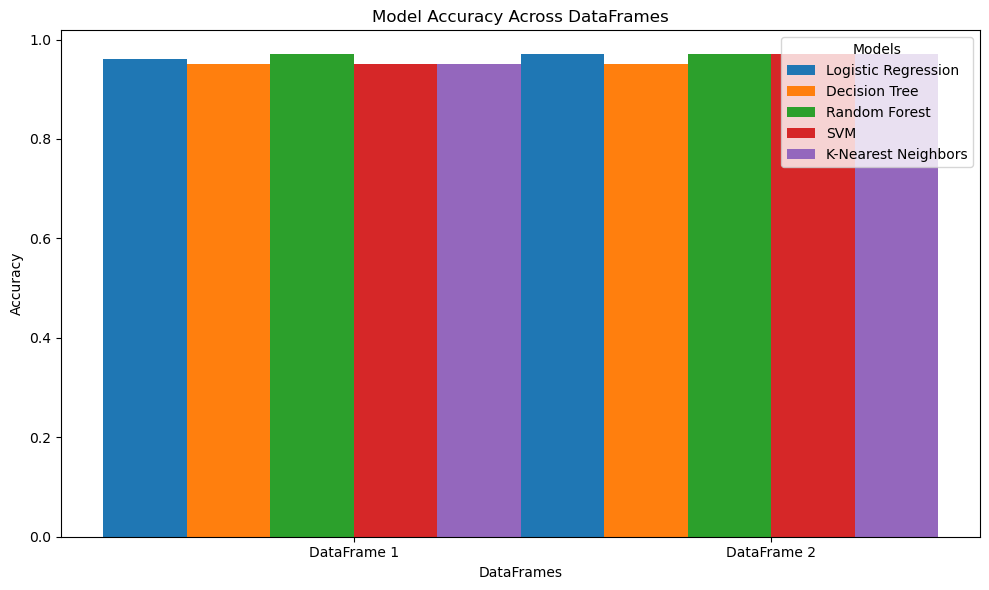

In [49]:
model_names = list(accuracies['DataFrame 1'].keys())
dataframe_names = list(accuracies.keys())
accuracy_values = [[accuracies[df][model] for df in dataframe_names] for model in model_names]


fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2
x = range(len(dataframe_names))

for i, model_name in enumerate(model_names):
    ax.bar([pos + width * i for pos in x], accuracy_values[i], width=width, label=model_name)

ax.set_xlabel('DataFrames')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Across DataFrames')
ax.set_xticks([pos + width * (len(model_names) / 2) for pos in x])
ax.set_xticklabels(dataframe_names)
ax.legend(model_names, title='Models')

plt.tight_layout()
plt.show()


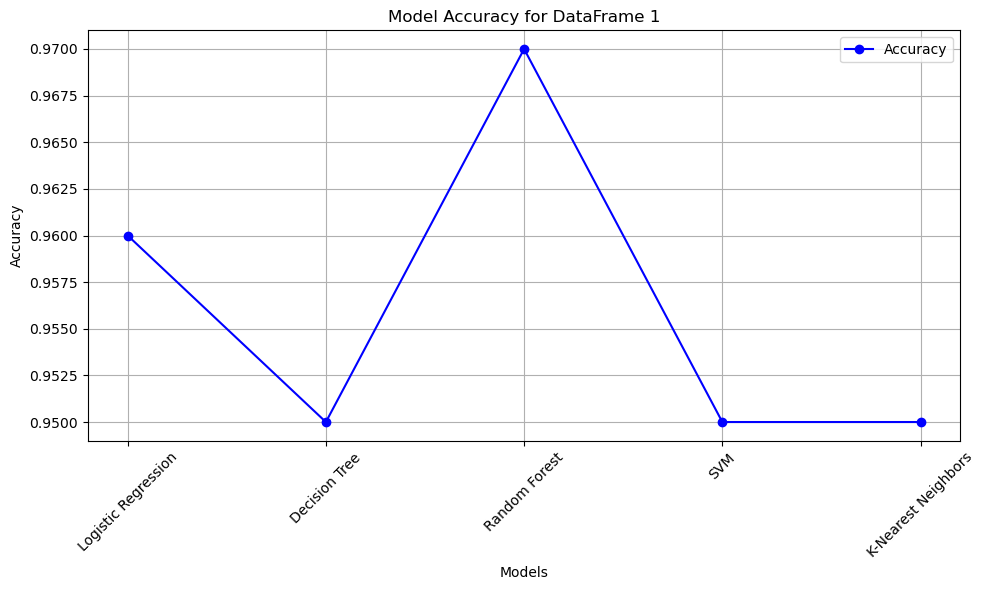

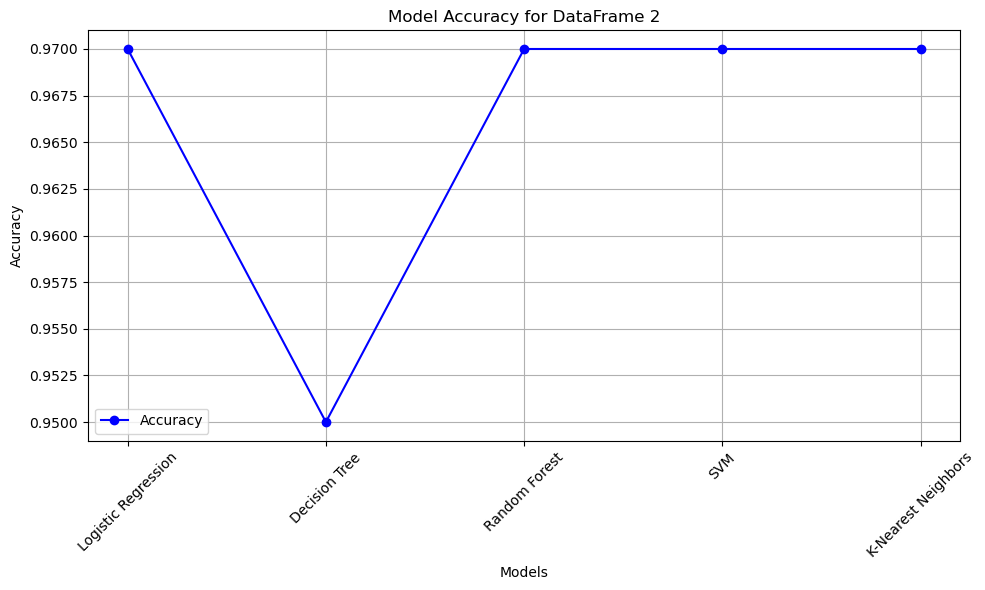

In [50]:
accuracies_df1 = {
    'Logistic Regression': 0.96,
    'Decision Tree': 0.95,
    'Random Forest': 0.97,
    'SVM': 0.95,
    'K-Nearest Neighbors': 0.95
}

accuracies_df2 = {
    'Logistic Regression': 0.97,
    'Decision Tree': 0.95,
    'Random Forest': 0.97,
    'SVM': 0.97,
    'K-Nearest Neighbors': 0.97
}


def create_line_plot(data, title):
    plt.figure(figsize=(10, 6))
    models = list(data.keys())
    accuracy_values = list(data.values())
    
    plt.plot(models, accuracy_values, marker='o', linestyle='-', color='b', label='Accuracy')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

create_line_plot(accuracies_df1, 'Model Accuracy for DataFrame 1')

create_line_plot(accuracies_df2, 'Model Accuracy for DataFrame 2')


Working with DataFrame 1
Confusion Matrix for Logistic Regression


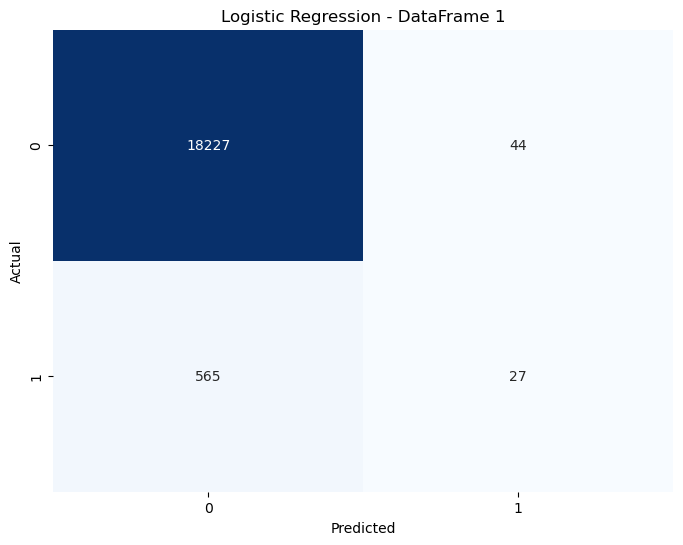

Confusion Matrix for Decision Tree


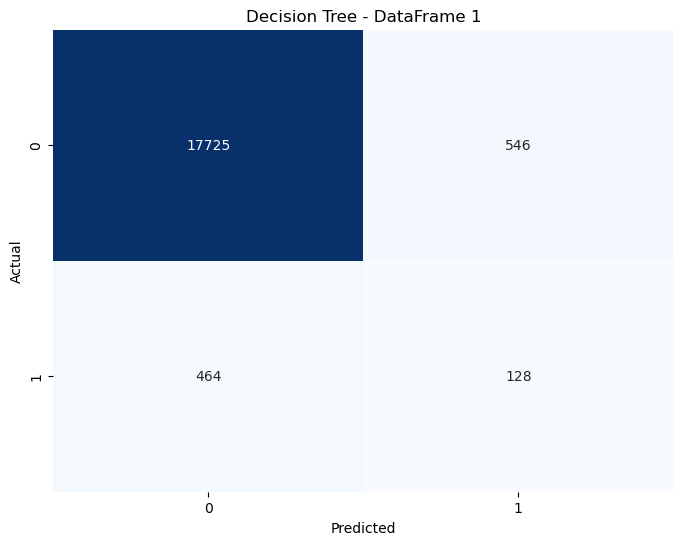

Confusion Matrix for Random Forest


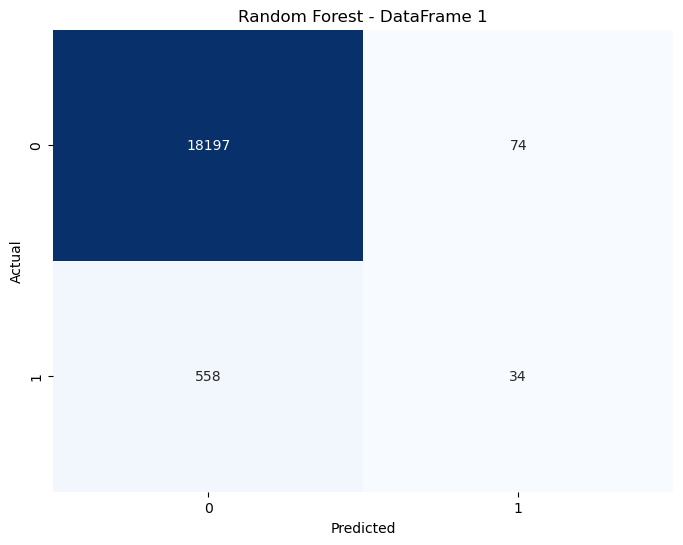

Confusion Matrix for SVM


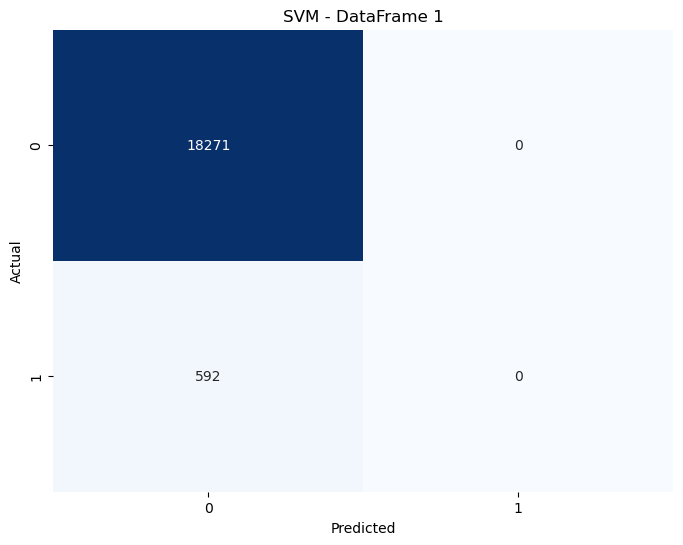

Confusion Matrix for K-Nearest Neighbors


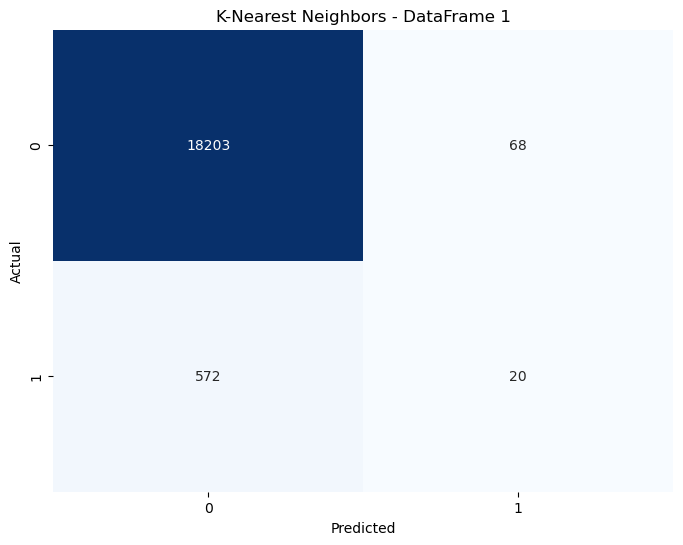

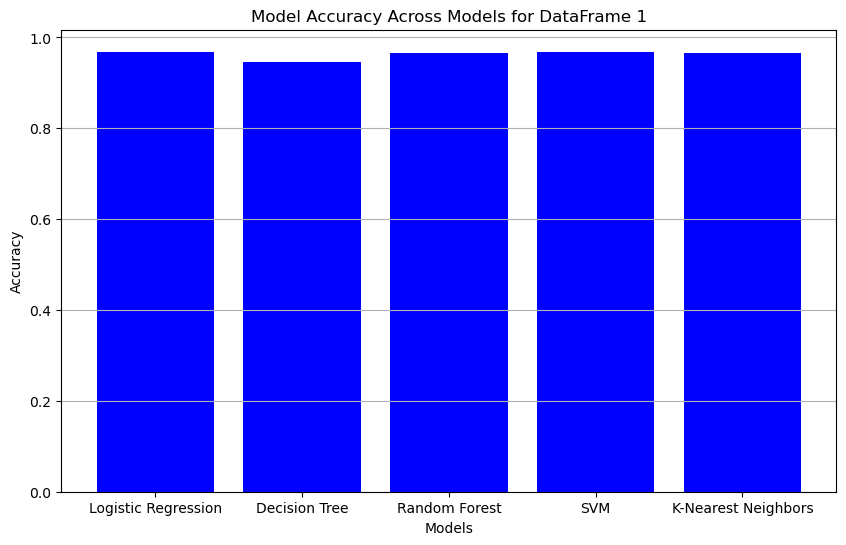

Working with DataFrame 2
Confusion Matrix for Logistic Regression


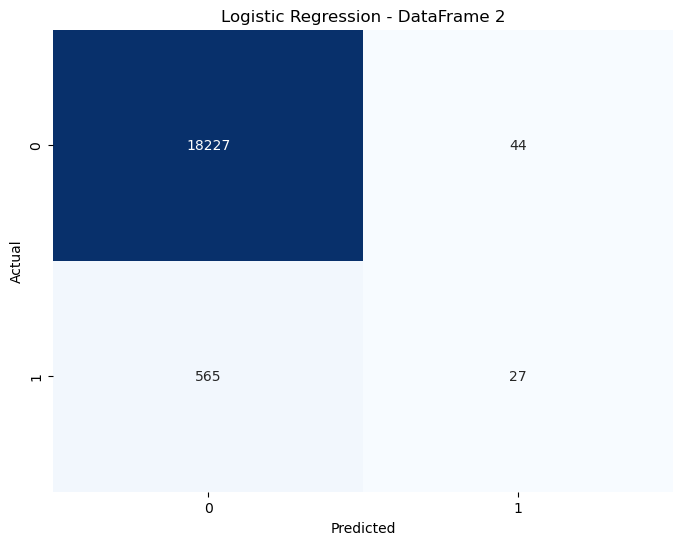

Confusion Matrix for Decision Tree


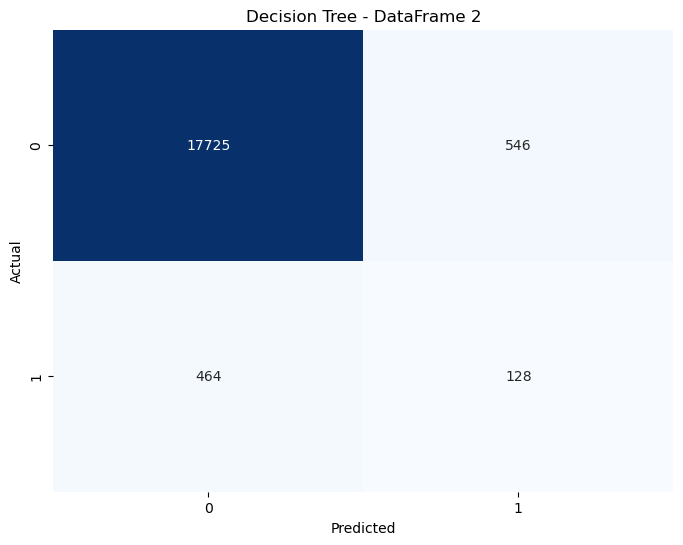

Confusion Matrix for Random Forest


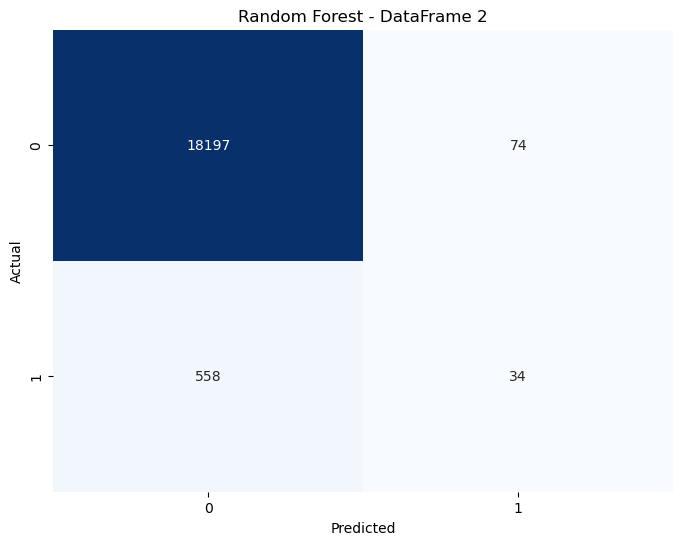

Confusion Matrix for SVM


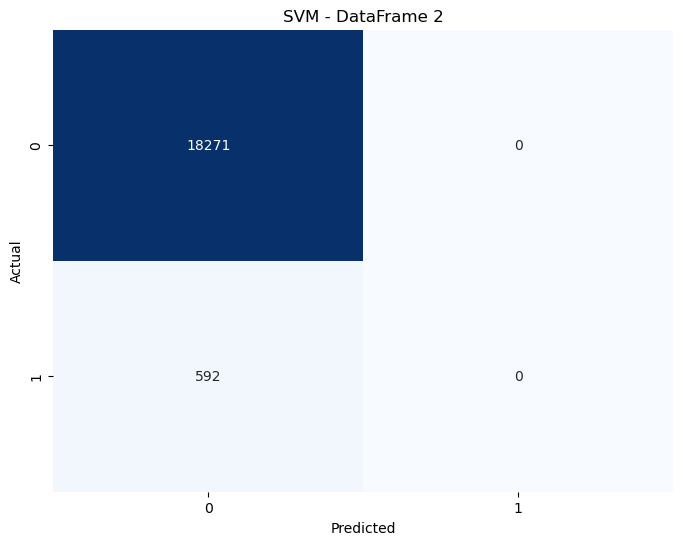

Confusion Matrix for K-Nearest Neighbors


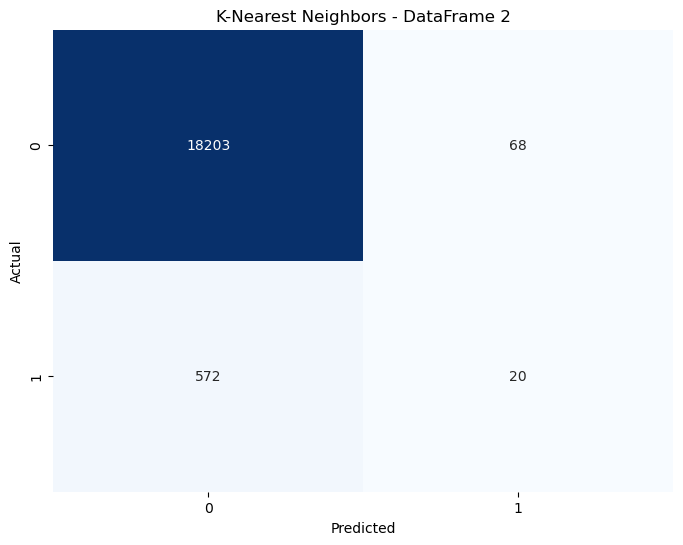

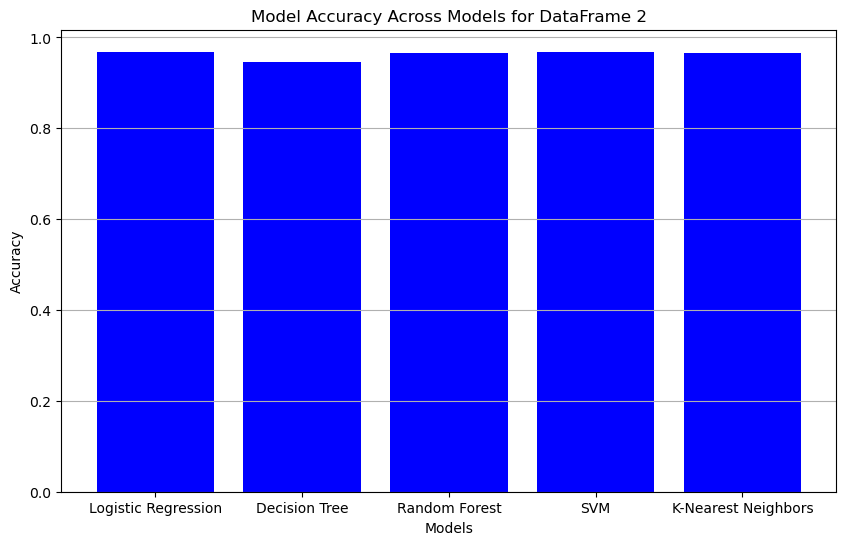

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


y_true_df1 = y_test
y_pred_df1 = y_pred

y_true_df2 = y_test
y_pred_df2 = y_pred

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def create_bar_plot(data, title):
    plt.figure(figsize=(10, 6))
    models = list(data.keys())
    accuracy_values = list(data.values())
    
    plt.bar(models, accuracy_values, color='blue')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.grid(axis='y')
    plt.show()

for i, (df_name, (y_true, y_pred)) in enumerate(zip(['DataFrame 1', 'DataFrame 2'], [(y_true_df1, y_pred_df1), (y_true_df2, y_pred_df2)])):
    print(f"Working with {df_name}")

    for model_name, model in models:
        print(f"Confusion Matrix for {model_name}")
        plot_confusion_matrix(y_true, model.predict(X_test), f'{model_name} - {df_name}')

    accuracy_data = {model_name: accuracy_score(y_true, model.predict(X_test)) for model_name, model in models}
    create_bar_plot(accuracy_data, f'Model Accuracy Across Models for {df_name}')
